# Prediksi Risiko Gagal Bayar Kredit
Proyek ini bertujuan untuk membangun model prediktif yang dapat mengidentifikasi apakah seseorang berisiko gagal membayar kreditnya atau tidak. Dataset yang digunakan berasal dari Kaggle: [Credit Risk Dataset](https://www.kaggle.com/datasets/laotse/credit-risk-dataset).

- **Nama:** Aura Rachmawaty
- **Email:** mc295d5x1618@student.devacademy.id
- **ID Dicoding:** MC295D5X1618

## Import Semua Packages/Library yang Digunakan

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

## 1. Setup Kaggle API dan Unduh Dataset
Langkah pertama adalah mengunduh dataset dari Kaggle menggunakan API. Anda perlu mengunggah file `kaggle.json` terlebih dahulu, lalu mengatur izin dan direktori yang sesuai.

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aurarachmawaty","key":"9f19d6a6d785e65863aeb8fb200d74e0"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d laotse/credit-risk-dataset
!unzip credit-risk-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/laotse/credit-risk-dataset
License(s): CC0-1.0
  0% 0.00/368k [00:00<?, ?B/s]
100% 368k/368k [00:00<00:00, 684MB/s]
Archive:  credit-risk-dataset.zip
  inflating: credit_risk_dataset.csv  


## 2. Memuat Dataset dan Menampilkan Data Awal
Setelah dataset diunduh dan diekstrak, data dimuat menggunakan Pandas. Langkah ini membantu kita memahami struktur data dan melihat beberapa sampel baris awal.

In [5]:
# Load dataset
df = pd.read_csv("credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


## 3. Eksplorasi Data dan Pra-Pemrosesan
- Mengecek tipe data dan missing value
- Menghapus atau mengisi nilai yang hilang
- Encoding variabel kategorikal ke dalam bentuk numerik menggunakan LabelEncoder
Langkah ini penting untuk menyiapkan data agar dapat digunakan dalam model machine learning.

In [9]:
# Lihat info awal
print(df.info())

# Cek missing values
print(df.isnull().sum())

# Drop rows dengan missing value (atau bisa gunakan imputasi)
df.dropna(inplace=True)

# Encode kolom kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Fitur dan label
X = df.drop("loan_status", axis=1)  # Asumsikan ini adalah target
y = df["loan_status"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB
None
person_age                

## 4. Split dan Standarisasi Data
- Data dibagi menjadi data latih (training) dan data uji (testing)
- Fitur dinormalisasi menggunakan `StandardScaler` untuk meningkatkan kinerja model

In [10]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 5. Pelatihan Model Machine Learning
Model yang digunakan adalah **Random Forest Classifier**, salah satu algoritma klasifikasi yang kuat dan banyak digunakan untuk prediksi risiko kredit karena kemampuannya menangani data numerik dan kategorikal secara efektif.


In [11]:
# Inisialisasi dan training model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

## 6. Evaluasi Model
Model dievaluasi menggunakan:
- **Classification Report**: precision, recall, f1-score
- **Confusion Matrix**
- **ROC-AUC Score** (untuk klasifikasi biner)

Tujuannya adalah untuk mengukur seberapa baik model dapat memprediksi risiko gagal bayar secara akurat.

In [12]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC-AUC Score (jika label biner)
if len(y.unique()) == 2:
    y_proba = model.predict_proba(X_test)[:,1]
    print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96      4443
           1       0.97      0.71      0.82      1285

    accuracy                           0.93      5728
   macro avg       0.95      0.85      0.89      5728
weighted avg       0.93      0.93      0.93      5728

Confusion Matrix:
 [[4419   24]
 [ 378  907]]
ROC-AUC Score: 0.9304265617843309


## Penjelasan Hasil Evaluasi Model

Model yang dibuat memiliki performa yang cukup baik dalam memprediksi risiko gagal bayar kredit.

- **Accuracy (Akurasi) 93%** artinya dari semua data yang diuji, model benar dalam memprediksi 93% kasus.
- Pada kelas **0 (nasabah yang membayar tepat waktu)**, model sangat akurat dengan tingkat recall 99%, artinya hampir semua nasabah yang benar-benar membayar tepat waktu terdeteksi dengan baik.
- Pada kelas **1 (nasabah yang berisiko gagal bayar)**, recallnya lebih rendah, yaitu 71%. Ini berarti model mendeteksi sekitar 7 dari 10 nasabah berisiko gagal bayar, tapi masih ada sekitar 3 dari 10 yang terlewat (false negatives).
- Precision pada kelas 1 adalah 97%, artinya jika model memprediksi seseorang berisiko gagal bayar, kemungkinan besar prediksi tersebut benar.
- **Confusion Matrix** menunjukkan model salah mengklasifikasikan 24 nasabah yang membayar tepat waktu sebagai risiko gagal bayar, dan 378 nasabah risiko gagal bayar terlewat tidak terdeteksi.
- **ROC-AUC Score 0.93** menunjukkan model ini memiliki kemampuan yang sangat baik untuk membedakan antara nasabah yang membayar tepat waktu dan yang berisiko gagal bayar.

Secara keseluruhan, model ini cukup efektif, tetapi masih bisa ditingkatkan terutama dalam mendeteksi risiko gagal bayar agar lebih sedikit nasabah yang terlewat.

## Visualisasi Akurasi Model

Bagian ini menampilkan grafik batang yang menggambarkan tingkat akurasi model pada data pelatihan (training) dan data pengujian (testing).  
Visualisasi ini berguna untuk melihat apakah model mengalami overfitting (akurasinya jauh lebih tinggi di data training) atau sudah generalisasi dengan baik ke data baru (testing).

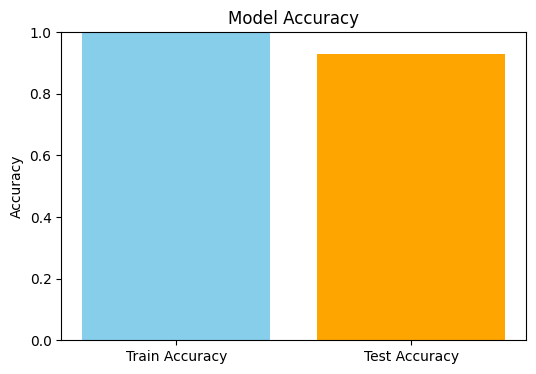

In [14]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Hitung akurasi
train_acc = accuracy_score(y_train, model.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)

# Plot akurasi
plt.figure(figsize=(6,4))
plt.bar(['Train Accuracy', 'Test Accuracy'], [train_acc, test_acc], color=['skyblue', 'orange'])
plt.ylim(0,1)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.show()

## Visualisasi Confusion Matrix dengan Heatmap

Confusion matrix memberikan gambaran tentang kinerja model dalam mengklasifikasikan data.  
Heatmap ini memudahkan interpretasi dengan menampilkan nilai jumlah prediksi benar dan salah secara visual menggunakan warna.  
- Baris mewakili label asli (True Label)  
- Kolom mewakili label hasil prediksi (Predicted Label)  
Analisis confusion matrix membantu kita memahami jenis kesalahan yang dibuat model, seperti false positive dan false negative.


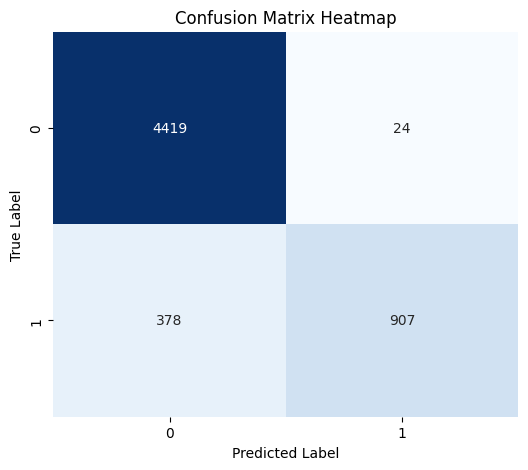

In [15]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

## Analisis Pentingnya Fitur
Visualisasi pentingnya fitur digunakan untuk mengetahui fitur mana yang paling berpengaruh dalam prediksi. Hal ini penting dalam interpretasi model dan pengambilan keputusan bisnis.


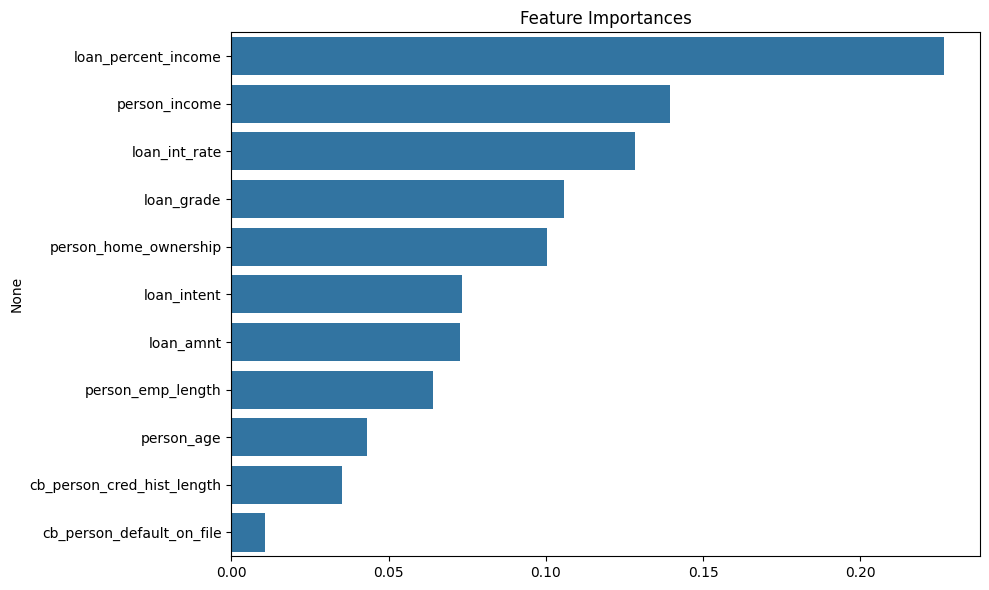

In [13]:
importances = model.feature_importances_
features = X.columns
sorted_idx = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[sorted_idx], y=features[sorted_idx])
plt.title("Feature Importances")
plt.tight_layout()
plt.show()

## Kesimpulan

Model prediksi risiko gagal bayar kredit yang dibangun menunjukkan performa yang baik dengan akurasi sebesar 93% dan ROC-AUC sebesar 0.93. Model ini mampu mengidentifikasi mayoritas nasabah yang membayar tepat waktu dengan sangat baik (recall 99%) dan juga cukup baik dalam mendeteksi nasabah yang berisiko gagal bayar (recall 71%).

Meskipun model memiliki presisi tinggi (97%) dalam memprediksi risiko gagal bayar, terdapat sejumlah risiko gagal bayar yang tidak terdeteksi (false negatives), yaitu sekitar 29% dari kasus risiko gagal bayar. Hal ini menunjukkan masih ada ruang untuk perbaikan terutama dalam meningkatkan kemampuan model untuk menangkap semua nasabah berisiko.

Secara keseluruhan, model ini sudah dapat dijadikan alat bantu yang efektif untuk meminimalkan risiko kredit bermasalah, namun disarankan untuk melakukan optimasi lebih lanjut atau menggunakan teknik penyeimbangan data agar deteksi risiko gagal bayar lebih optimal.
